Data Set Information:

Nowdays airline tickets can vary dynmically and significantly for the same flight. customers are seeking to get the lowest prices for their flights. so here we introduces our model to save money for customers by predicting the flights fares taking various features into considerations such as flight time, destination, source, dep time , arrival time etc..

Attribute Information:
1. Airline : names of airline companies
2. Date_of_Journey - day/month/year
3. Source - city from where journey starts
4. Destination - journey ending city
5. Route - way or direction of flight
6. Dep_Time - the time when a flight leaves the gate(hour:minute)
7. Arrival_Time - the time when a flight arrives the gate(hour:minute)
8. Duration - hour:minute
9. Total_Stops - number of stops
10. Additional_Info - extra information
11. Price - fare of a flight

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
train_data=pd.read_excel("C:/Users/user/Desktop/projects/Flight fare pred/Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns',None) #displays max number of cols

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Dataset Information

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


# Summary Statistics

Brief Information of different descriptive statistics-

1. Measures of Frequency :- Count, Percent, Frequency.
2. Measures of Central Tendency :- Mean, Median, and Mode.
3. Measures of Dispersion or Variation:- Range(min,max),Variance, Standard Deviation.
4. Measures of Position :- Percentile Ranks, Quartile Ranks.

In [6]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
train_data.shape

(10683, 11)

# Checking for missing values in each column

In [8]:
!pip install missingno

<AxesSubplot:>

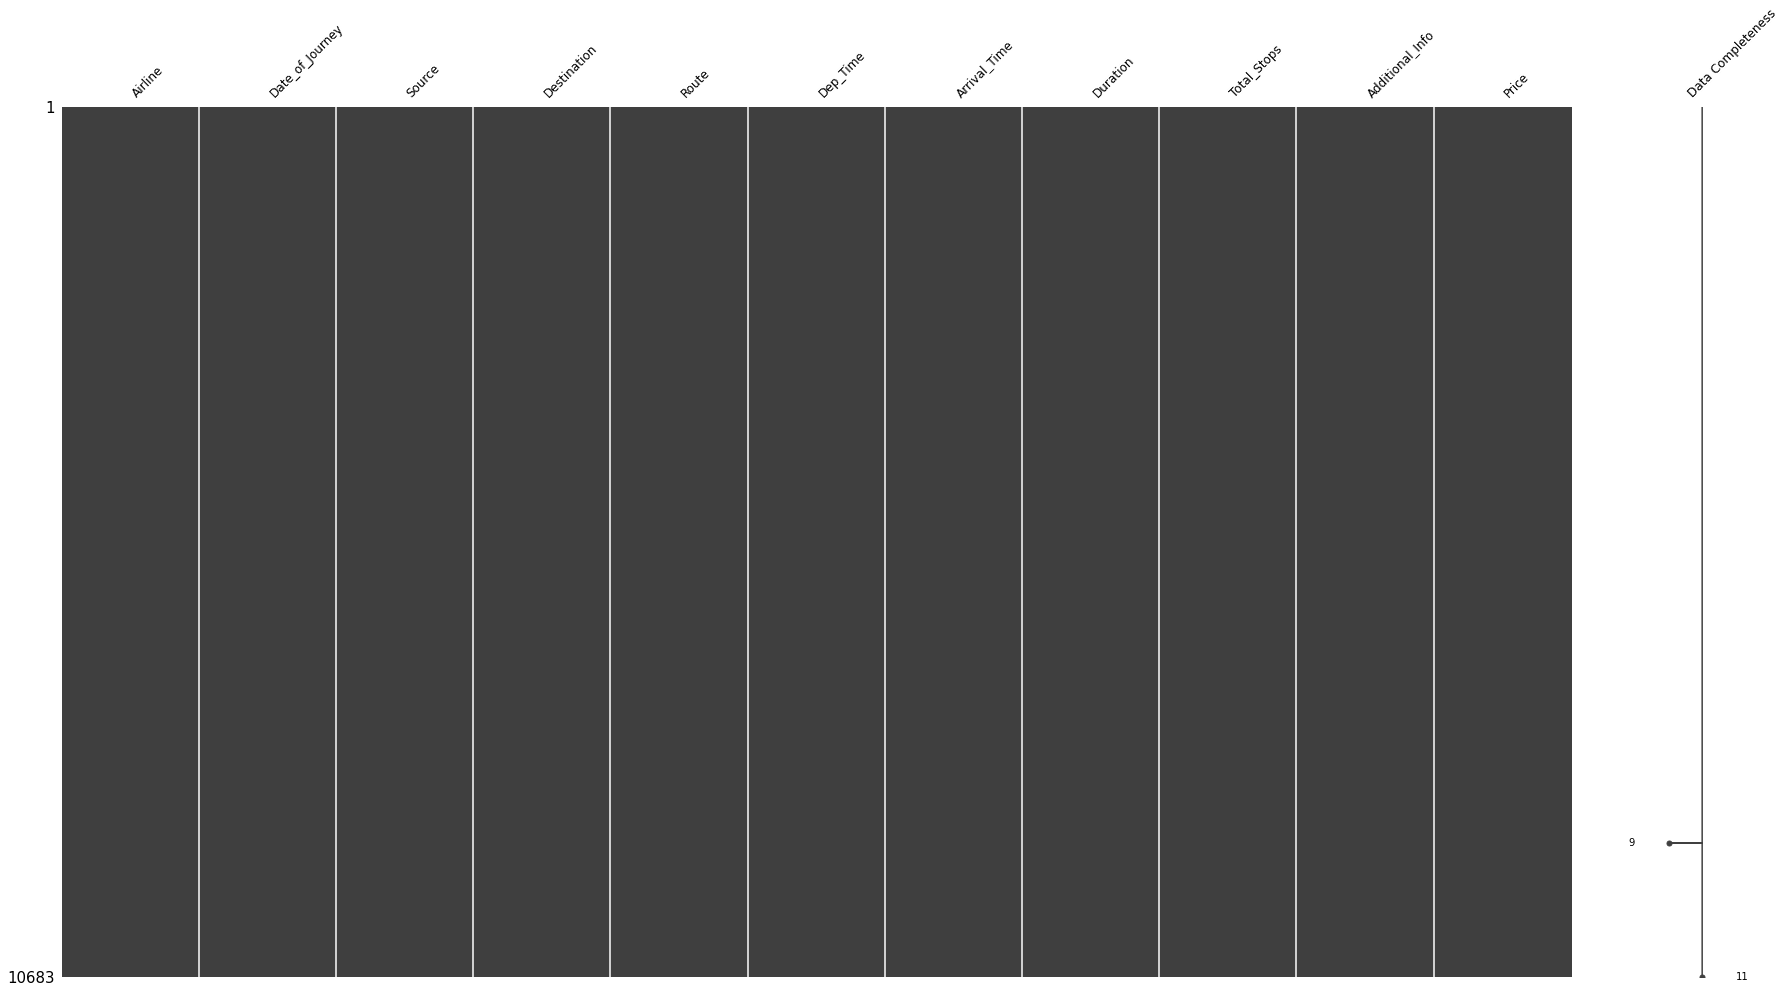

In [10]:
import missingno as msno
msno.matrix(train_data,labels=[train_data.columns],figsize=(30,16),fontsize=12)

In [11]:
train_data.dropna(inplace= True)    #dropping Nan values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Analysing Categorical Variables

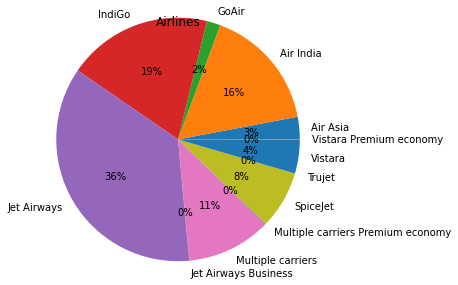

In [12]:
Airline_var=pd.crosstab(index=train_data['Airline'],columns='% observations')
plt.pie(Airline_var['% observations'],labels=Airline_var['% observations'].index,autopct='%.0f%%',radius=1.4)
plt.title('Airlines')
plt.show()

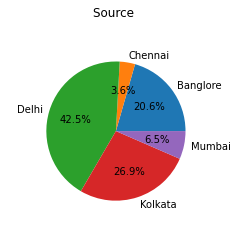

In [13]:
Source_var=pd.crosstab(index=train_data['Source'],columns='% observations')
plt.pie(Source_var['% observations'],labels=Source_var['% observations'].index,autopct='%1.1f%%',radius=0.8)
plt.title('Source ')
plt.show()

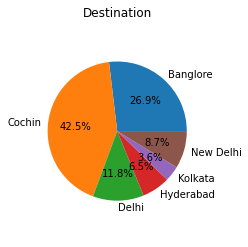

In [14]:
Destination_var=pd.crosstab(index=train_data['Destination'],columns='% observations')
plt.pie(Destination_var['% observations'],labels=Destination_var['% observations'].index,autopct='%1.1f%%',radius=0.8)
plt.title('Destination')
plt.show()

# EDA

From description we can see that Date_of_Journey is a object data type, *Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction *For this we require pandas to_datetime to convert object data type to datetime dtype *.dt.day method will extract only day of that date *.dt.month method will extract only month of that date

In [15]:
#here date and time is of string so to use them we will convert them into date time type and use to_datetime()
# .dt.date method will extract only date 
# .dt.month will extract the month

train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month
#train_data["Journey_year"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.year

# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
#similarly we will extract minute and seconds from dep_time()
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
# Similar to Date_of_Journey we can extract values from dt.hour() and dt.min()

train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [22]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [23]:
#droping Duration 
train_data.drop(["Duration"], axis = 1, inplace = True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Plotting

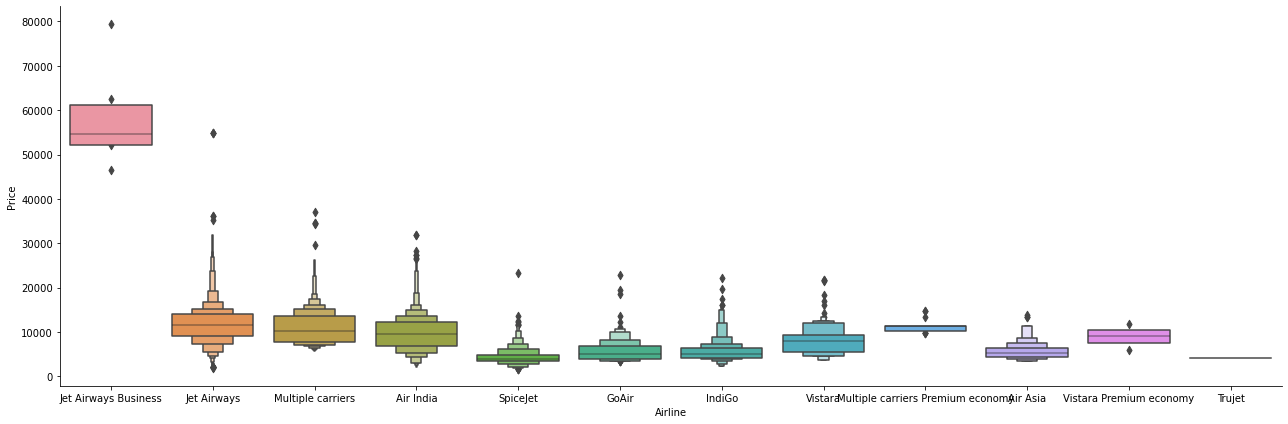

In [24]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
#Inference: Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline 
#and we can conclude that Jet Airways has the most outliers in terms of price.

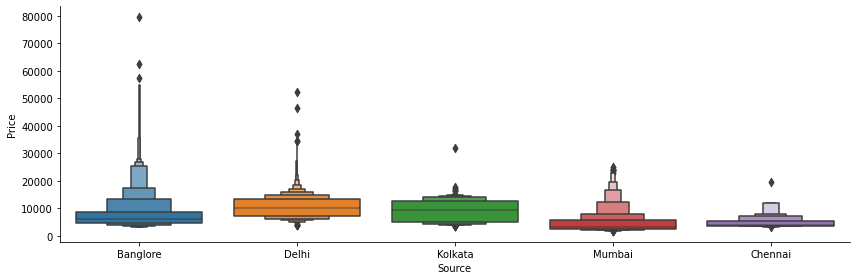

In [25]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Journey_day'}>,
        <AxesSubplot:title={'center':'Journey_month'}>],
       [<AxesSubplot:title={'center':'Dep_hour'}>,
        <AxesSubplot:title={'center':'Dep_min'}>,
        <AxesSubplot:title={'center':'Arrival_hour'}>],
       [<AxesSubplot:title={'center':'Arrival_min'}>,
        <AxesSubplot:title={'center':'Duration_hours'}>,
        <AxesSubplot:title={'center':'Duration_mins'}>]], dtype=object)

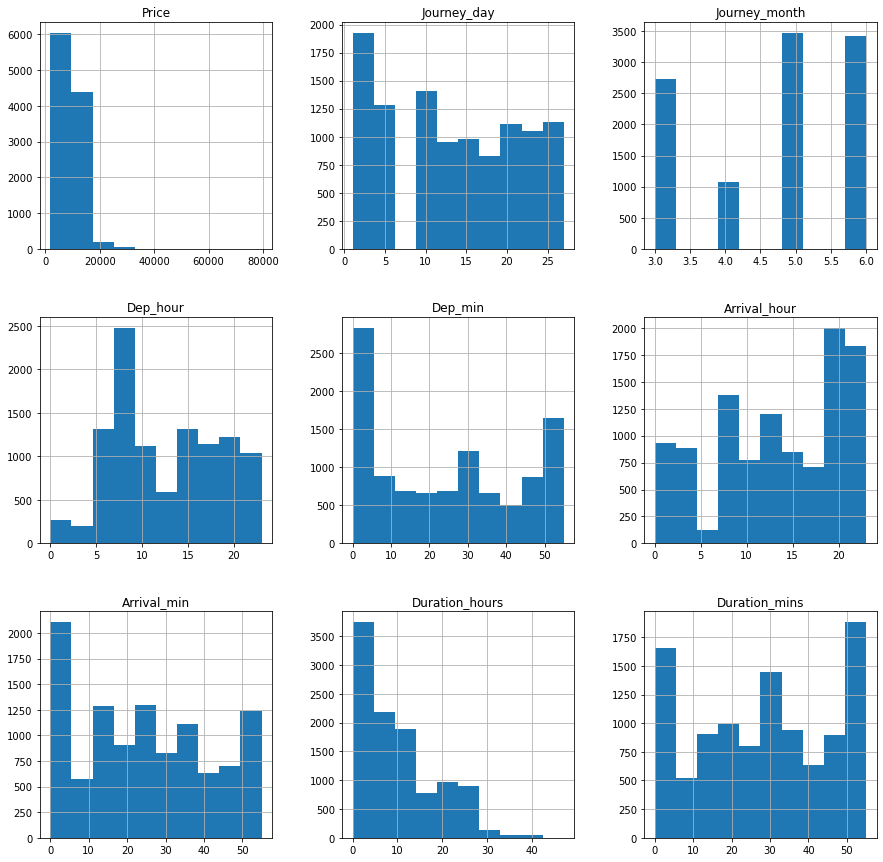

In [26]:
train_data.hist(figsize=(15,15))

# Box plot(Outliers Detection)

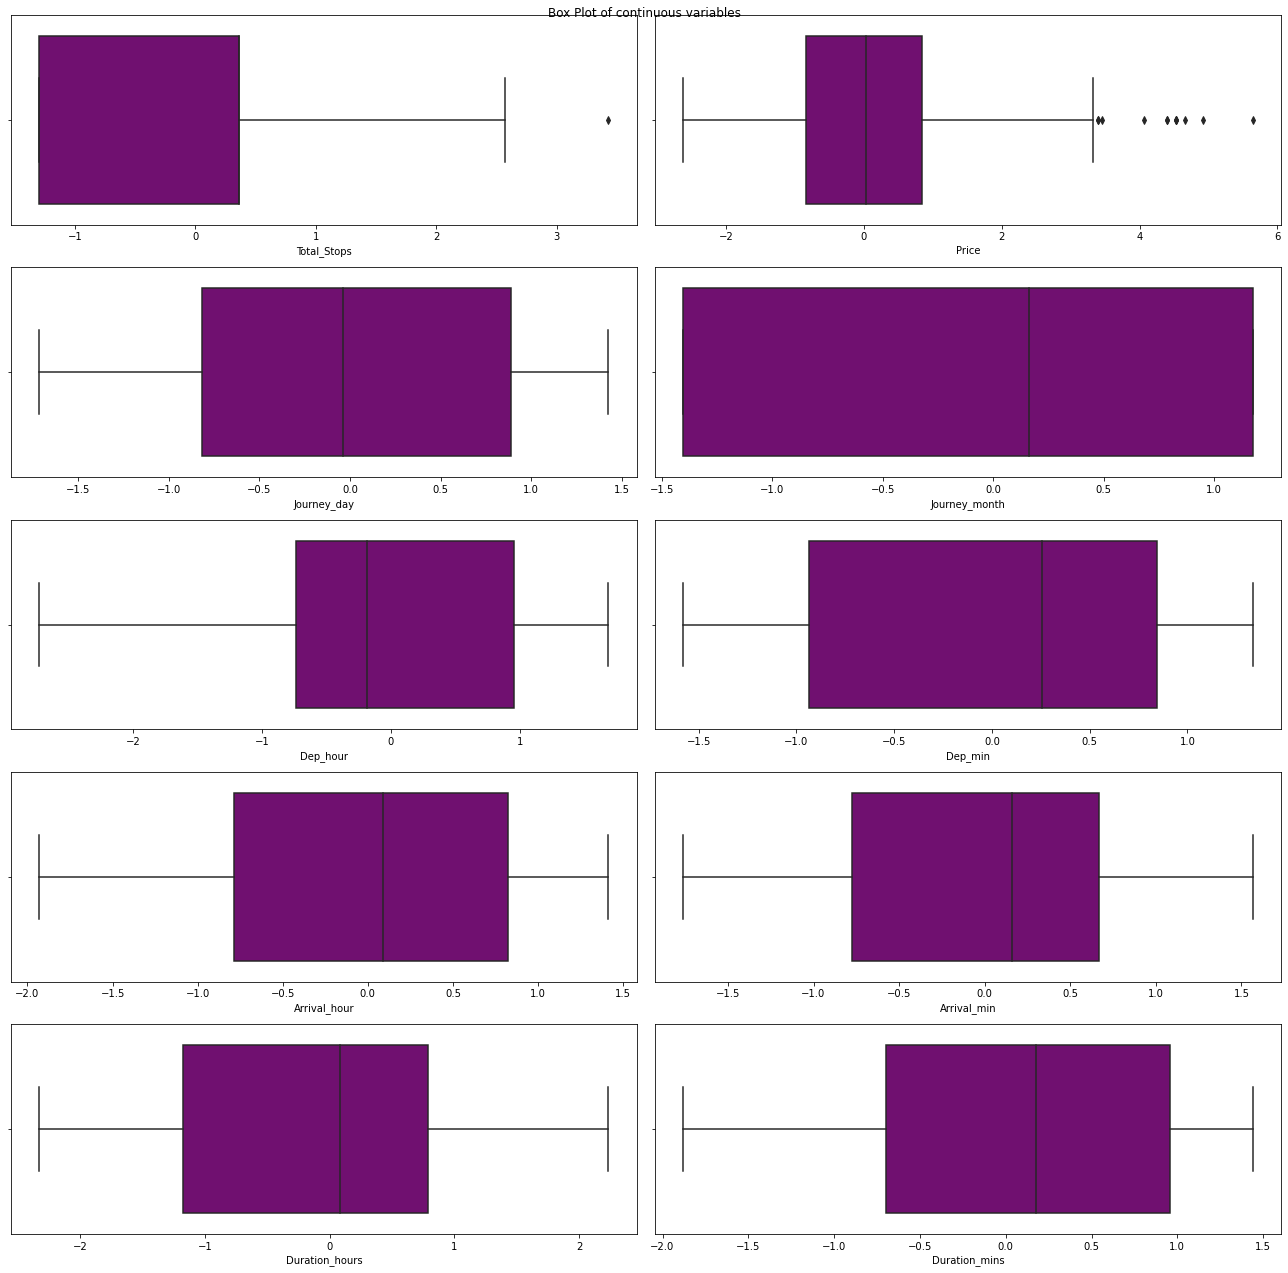

In [86]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(train_data1.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'White'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=train_data1, x=col, ax=ax,color='Purple')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

# Data distribution after applying Power Transformer

In [37]:
#selecting variables that have data types float and int.
var=list(train_data1.select_dtypes(include=['float64','int64']).columns)
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
train_data1[var]=sc_X.fit_transform(train_data1[var])

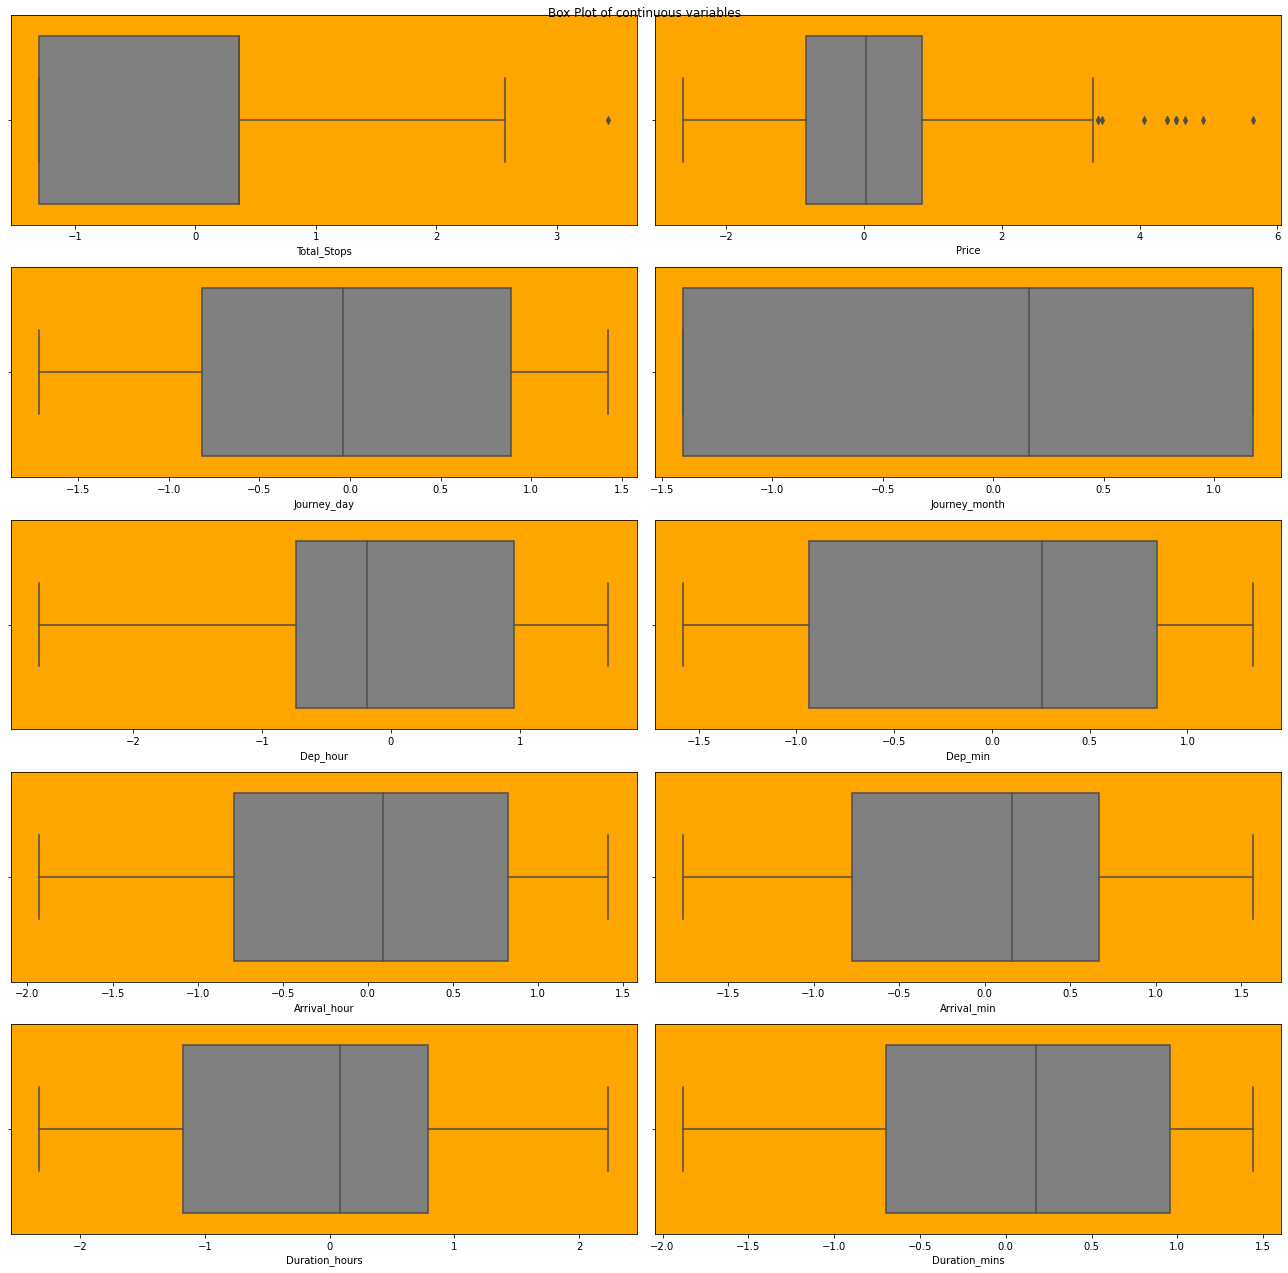

In [38]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(train_data1.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'Orange'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=train_data1, x=col, ax=ax,color='Grey')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

# Handling Categorical Data
### Nominal data --> data are not in any order --> OneHotEncoder is used in this case
### Ordinal data --> data are in order --> LabelEncoder is used in this case

In [27]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [28]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [29]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [30]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [32]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [33]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other so drop Route and use Total_stops

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True) #dropping column of missing values since it is of no use
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [34]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [35]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

train_data1 = pd.concat([train_data, Airline, Source, Destination], axis = 1)  #concatenating column-wise
train_data1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
train_data1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
train_data1.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. **heatmap**
2. **feature_importance_**
3. **Select K-Best**

In [39]:
train_data1.shape

(10682, 30)

In [40]:
train_data1.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [41]:
X = train_data1.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.297820,1.164296,-1.401748,1.545888,0.023186,-1.790733,-0.776578,-1.175643,1.200413,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.574617,-1.716424,0.161418,-1.356237,1.179354,-0.056006,-0.433010,-0.055254,-0.099976,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1.574617,-0.405463,1.175096,-0.548198,0.255935,-1.362584,0.156840,1.074715,-1.877928,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0.358782,-0.041621,0.161418,0.956329,-0.933677,1.413910,0.420855,-0.393117,-0.099976,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.358782,-1.716424,-1.401748,0.646652,1.179354,1.118899,0.670321,-0.603213,0.955571,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
y = train_data1.iloc[:, 1]
y.head()

0   -1.367854
1   -0.138984
2    1.086164
3   -0.536300
4    0.993291
Name: Price, dtype: float64

<AxesSubplot:>

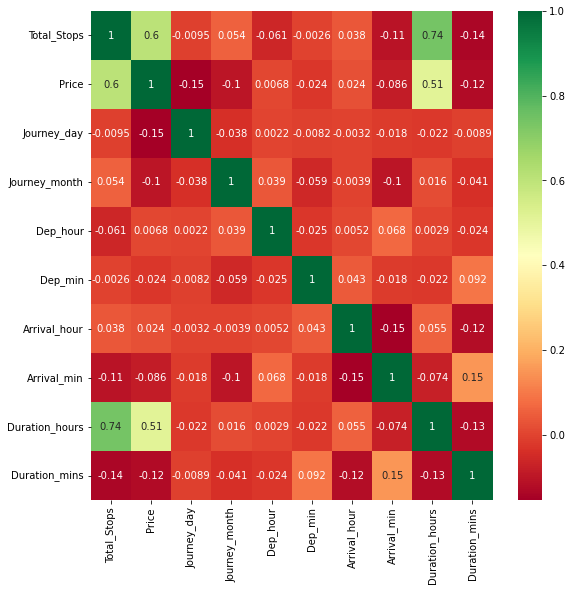

In [43]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (9,9))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

In [44]:
# Important feature selection using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [45]:
print(selection.feature_importances_)

[2.38586575e-01 9.00574360e-02 4.81533030e-02 1.76355411e-02
 1.72545047e-02 1.89575486e-02 1.45993822e-02 2.53675909e-01
 1.24878200e-02 1.05626097e-02 3.43108195e-03 3.32518865e-02
 1.23665315e-01 1.15663620e-02 1.29258736e-02 8.44583569e-04
 8.13641019e-03 1.81796827e-04 5.66425720e-03 1.53793759e-04
 1.07501319e-03 1.33569626e-02 6.03649473e-03 9.60077891e-03
 1.59817641e-02 7.55731738e-03 6.55009230e-03 8.00837426e-04
 1.72487495e-02]


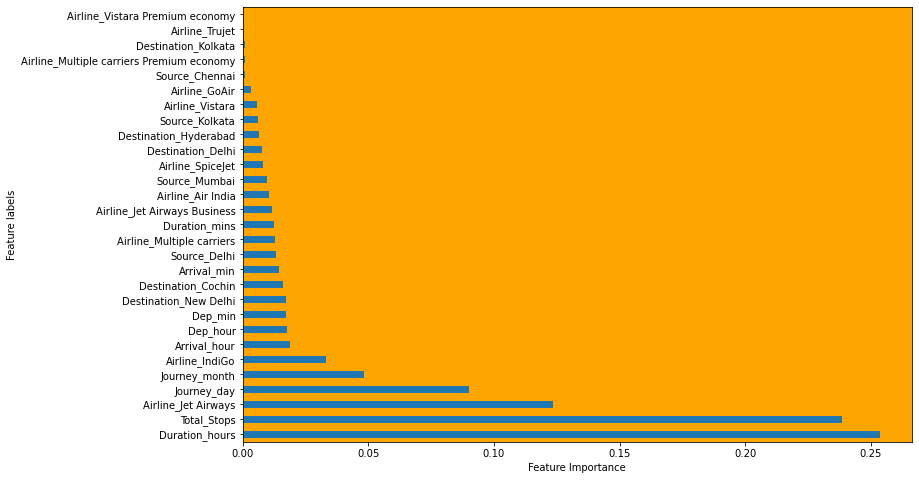

In [46]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.ylabel("Feature labels")
plt.xlabel("Feature Importance")
plt.show()

In [47]:
#Select K-Best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#Correlation

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x16457F58>)

# Fitting model
1. Split dataset into train and test set in order to prediction w.r.t X_test.
2. If needed do scaling of data
3. Scaling is not done in Random forest
4. Import model
5. Fit the data
6. Predict w.r.t X_test
7. In regression check RSME Score
8. Plot graph

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import statsmodels
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [54]:
#creating dictionary for storing different models accuracy
model_comparison={}

# Splitting our dataset into train and test set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Multiple Linear Regression

In [58]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),
                                    mean_absolute_error(y_test,y_pred),np.sqrt(metrics.mean_squared_error(y_test,y_pred))]

Model R-Square : 71.86%
Model MSE : 28.95%
Cross Val Accuracy: -491693224965015527751680.00 %
Cross Val Standard Deviation: 983386449930031055503360.00 %


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


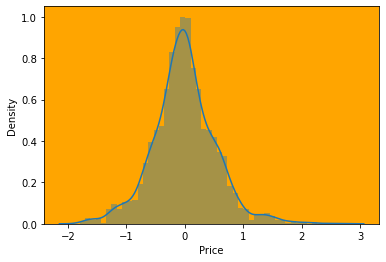

In [59]:
sns.distplot(y_test-y_pred)
plt.show()

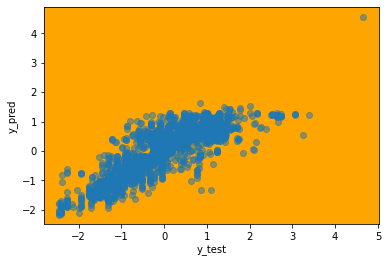

In [60]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Linear Regression Summary

In [61]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.716
Model:                            OLS   Adj. R-squared (uncentered):              0.715
Method:                 Least Squares   F-statistic:                              858.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                        0.00
Time:                        16:20:58   Log-Likelihood:                         -6717.5
No. Observations:                8545   AIC:                                  1.348e+04
Df Residuals:                    8520   BIC:                                  1.366e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4047      0.012     33.028      0.000       0.381       0.429
x2            -0.1149      0.006    -19.715      0.000      -0.126      -0.103
x3            -0.0839      0.007    -12.835      0.000      -0.097      -0.071
x4             0.0127      0.006      2.141      0.032       0.001       0.024
x5            -0.0178      0.006     -2.939      0.003      -0.030      -0.006
x6            -0.0080      0.006     -1.330      0.184      -0.020       0.004
x7             0.0033      0.006      0.525      0.600      -0.009       0.015
x8             0.0597      0.012      4.850      0.000       0.036       0.084
x9            -0.0024      0.006     -0.389      0.697      -0.014       0.010
x10            0.1630      0.014     11.461      0.000       0.135       0.191
x11            0.0046      0.007      0.626      0.531      -0.010       0.019
x12            0.0281      0.014      1.938      0.053      -0.000       0.056
x13            0.4653      0.017     26.655      0.000       0.431       0.500
x14            0.1064      0.006     18.247      0.000       0.095       0.118
x15            0.2554      0.013     20.176      0.000       0.231       0.280
x16            0.0376      0.006      6.338      0.000       0.026       0.049
x17           -0.0463      0.011     -4.365      0.000      -0.067      -0.026
x18           -0.0051      0.006     -0.876      0.381      -0.016       0.006
x19            0.1137      0.009     12.356      0.000       0.096       0.132
x20            0.0115      0.006      1.983      0.047       0.000       0.023
x21           -0.0043      0.003     -1.421      0.155      -0.010       0.002
x22            0.0137      0.003      4.390      0.000       0.008       0.020
x23            0.0100      0.004      2.382      0.017       0.002       0.018
x24           -0.0714      0.003    -23.231      0.000      -0.077      -0.065
x25            0.0137      0.003      4.390      0.000       0.008       0.020
x26           -0.0548      0.006     -9.478      0.000      -0.066      -0.043
x27           -0.0714      0.003    -23.231      0.000      -0.077      -0.065
x28           -0.0043      0.003     -1.421      0.155      -0.010       0.002
x29            0.0873      0.006     15.576      0.000       0.076       0.098
==============================================================================
Omnibus:                      589.618   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1965.120
Skew:                           0.313   Prob(JB):                         0.00
Kurtosis:                       5.264   Cond. No.                     1.40e+16
=============================================================

# Linearity Assumption 

## Checking for normality of the residuals

In [62]:
residuals = lin_reg.resid
np.mean(residuals)

-0.0007359019949434146

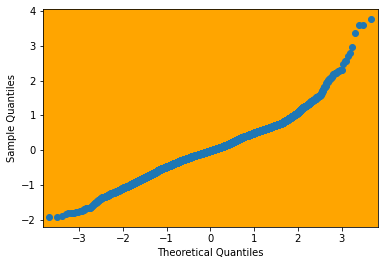

In [63]:
sm.qqplot(residuals)
plt.show()

## Multicollinearity assumption

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Total_Stops,3.651543
1,Journey_day,1.002697
2,Journey_month,1.022830
3,Dep_hour,1.018446
4,Dep_min,1.021049
5,Arrival_hour,1.055272
6,Arrival_min,1.089885
7,Duration_hours,3.676177
8,Duration_mins,1.077575


## Autocorrelation assumption

In [65]:
def calculate_residuals(model, features, label):
# Creates predictions on the features with the model and calculates residuals
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [66]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [67]:
 autocorrelation_assumption(model,X_train,y_train)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.8719058729137992
Little to no autocorrelation 

Assumption satisfied


## Homoscedasticity assumption

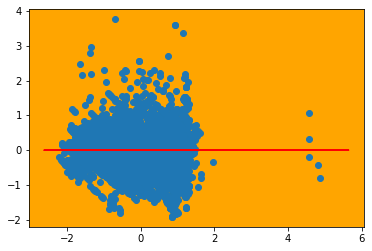

In [68]:
plt.scatter(lin_reg.predict(X_train), residuals)
plt.plot(y_train, [0]*len(y_train),c='r')

# Decision Trees

In [70]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Decision Tree Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred)
                                    ,mean_absolute_error(y_test,y_pred),np.sqrt(metrics.mean_squared_error(y_test,y_pred))]

Model R-Square : 78.45%
Model MSE : 22.17%
Cross Val Accuracy: 76.27 %
Cross Val Standard Deviation: 1.28 %


# Random Forest 

In [71]:
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Random Forest Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred)
                                ,mean_absolute_error(y_test,y_pred),np.sqrt(metrics.mean_squared_error(y_test,y_pred))]

Model R-Square : 85.54%
Model MSE : 14.88%
Cross Val Accuracy: 84.13 %
Cross Val Standard Deviation: 1.48 %


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


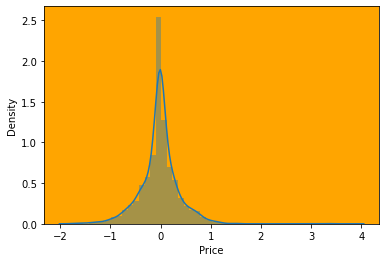

In [72]:
sns.distplot(y_test-y_pred)
plt.show()

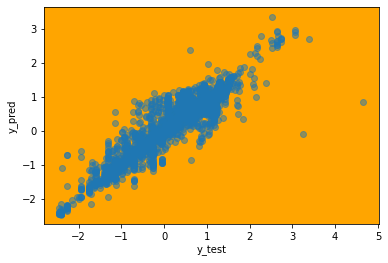

In [73]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Hyperparameter Tuning
1. Choose following method for hyperparameter tuning
2. RandomizedSearchCV --> Fast
3. GridSearchCV
4. Assign hyperparameters in form of dictionary
5. Fit the model
6. Check best paramters and best score

In [74]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [75]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [76]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2) 

In [77]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  46.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  48.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  56.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  45.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  45.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=  11.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=300; total time=  12.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_e

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=0),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [78]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [79]:
rf_random.best_score_

-0.13337108815770088

In [80]:
prediction = rf_random.predict(X_test)

In [81]:
metrics.r2_score(y_test,prediction)
model_comparison['After hypertuning']=[r2_score(y_test,prediction),mean_squared_error(y_test,prediction)
                            ,mean_absolute_error(y_test,prediction),np.sqrt(metrics.mean_squared_error(y_test,prediction))]

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


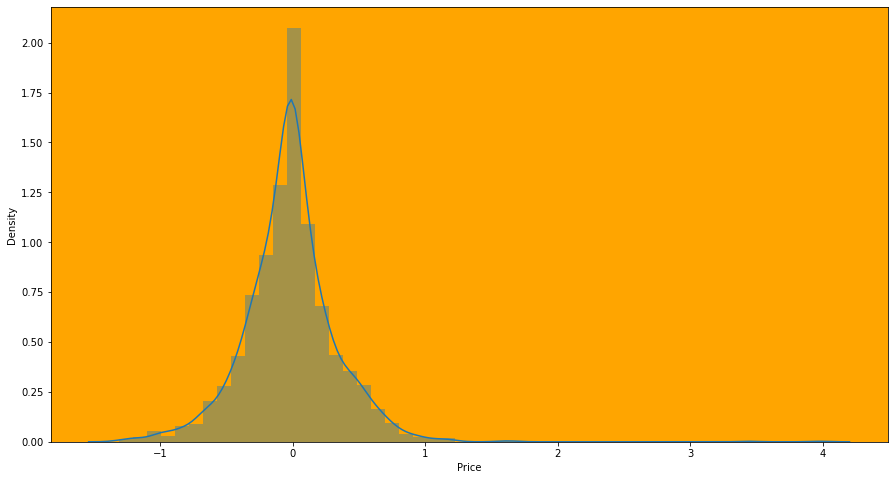

In [82]:
plt.figure(figsize = (15,8))
sns.distplot(y_test-prediction)
plt.show()

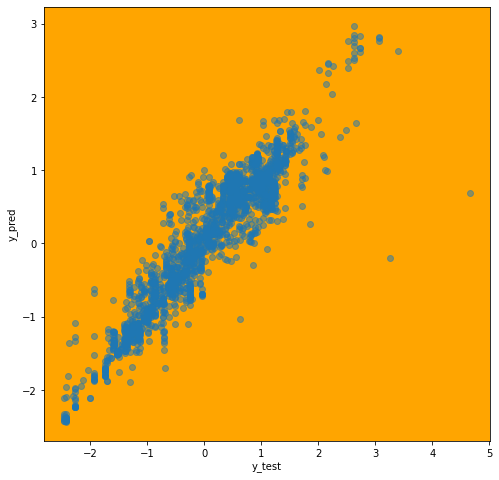

In [83]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.2431856182456858
MSE: 0.12443169557021415
RMSE: 0.352748771181721


# Model Comparison

In [85]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['R-Square','MSE','MAE','RMSE']
Model_com_df=Model_com_df.sort_values(by='R-Square',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')                   

,R-Square,MSE,MAE,RMSE
After hypertuning,87.90%,12.44%,24.32%,35.27%
Random Forest Regression,85.54%,14.88%,25.21%,38.58%
Decision Tree Regression,78.45%,22.17%,28.03%,47.08%
Linear Regression,71.86%,28.95%,39.87%,53.81%
